In [2]:
import pandas as pd

# Load the provided Excel file
file_path = 'Task.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the workbook
sheet_names = excel_data.sheet_names
sheet_names


['data', 'test', 'task']

In [3]:
# Load the "data" sheet into a DataFrame and display the first few rows
data_sheet = pd.read_excel(file_path, sheet_name='data')
data_sheet.head(), data_sheet.columns


(    id  visit_id  visitor_id    domain      url country                date  \
 0   v1   visit_1   visitor_1  domain_2  url_118    c_01 2013-11-04 14:48:10   
 1   v2   visit_2   visitor_2  domain_2  url_141    c_02 2014-05-16 14:28:02   
 2   v3   visit_3   visitor_3  domain_2   url_23    c_03 2013-02-20 09:24:27   
 3   v6   visit_6   visitor_6  domain_2   url_40    c_06 2014-05-06 22:26:43   
 4  v10  visit_10  visitor_10  domain_2  url_131    c_03 2013-11-27 15:10:30   
 
    page_views  time on site  
 0           1             0  
 1           1             0  
 2           1             0  
 3           1            71  
 4           1             0  ,
 Index(['id', 'visit_id', 'visitor_id', 'domain', 'url', 'country', 'date',
        'page_views', 'time on site'],
       dtype='object'))

In [4]:
# Load the "test" sheet into a DataFrame and display the first few rows
test_sheet = pd.read_excel(file_path, sheet_name='test')
test_sheet.head(), test_sheet.columns


(   record_id  Years date    domain    url country  page views
 0          1   2012  Jan  domain_1  url_1    c_03         1.0
 1          2   2012  Jan  domain_1  url_1    c_05         2.0
 2          3   2012  Jan  domain_1  url_1    c_07        12.0
 3          4   2012  Jan  domain_1  url_1    c_08         2.0
 4          5   2012  Jan  domain_1  url_1    c_09         1.0,
 Index(['record_id', 'Years', 'date', 'domain', 'url', 'country', 'page views'], dtype='object'))

In [5]:
# Load the "task" sheet into a DataFrame and display the first few rows
task_sheet = pd.read_excel(file_path, sheet_name='task')
task_sheet.head(), task_sheet.columns


(   Unnamed: 0                                         Unnamed: 1
 0         NaN  1. The attached anonymised dataset includes we...
 1         NaN                                                NaN
 2         NaN                                                NaN
 3         NaN                                                NaN
 4         NaN                                                NaN,
 Index(['Unnamed: 0', 'Unnamed: 1'], dtype='object'))

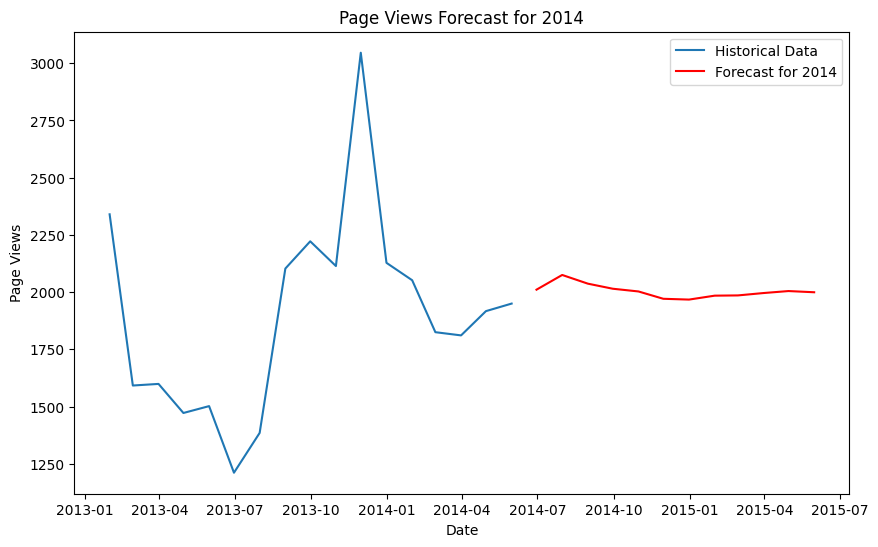

Total Visits: 23061
Unique Visitors: 20556
Average Page Views per Visit: 0.9291658268306027
Bounce Rate (%): 139.92888426347514
Average Time on Site (seconds): 45.031184312822134


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Load the Excel file
file_path = 'Task.xlsx'
data = pd.read_excel(file_path, sheet_name='data')
test_data = pd.read_excel(file_path, sheet_name='test')

# Preprocess the data
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Resample the data to get monthly page views
monthly_data = data['page_views'].resample('M').sum()

# Forecasting using ARIMA
model = ARIMA(monthly_data, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Historical Data')
plt.plot(forecast, label='Forecast for 2014', color='red')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Page Views Forecast for 2014')
plt.legend()
plt.show()

# KPIs calculation
total_visits = data['visit_id'].nunique()
unique_visitors = data['visitor_id'].nunique()
average_page_views_per_visit = data['page_views'].mean()
bounce_rate = (data[data['page_views'] == 1].shape[0] / total_visits) * 100
average_time_on_site = data['time on site'].mean()

print("Total Visits:", total_visits)
print("Unique Visitors:", unique_visitors)
print("Average Page Views per Visit:", average_page_views_per_visit)
print("Bounce Rate (%):", bounce_rate)
print("Average Time on Site (seconds):", average_time_on_site)

# Save the forecast to the test sheet in the specified range
forecast_start_date = datetime(2014, 1, 1)
forecast_end_date = datetime(2014, 12, 31)
forecast_dates = pd.date_range(forecast_start_date, forecast_end_date, freq='MS')

forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast.values})
forecast_df.to_excel('forecast_output.xlsx', index=False)

In [6]:
import openpyxl

# Load the workbook and the "test" sheet
workbook = openpyxl.load_workbook(file_path)
test_sheet = workbook['test']

# Insert the forecast values into cells G10448:G12403
for i, value in enumerate(forecast.values, start=10448):
    test_sheet[f'G{i}'] = value

# Save the workbook with the forecast inserted
workbook.save('forecast_output_with_forecast.xlsx')


### Different Model Comparison

10:11:41 - cmdstanpy - INFO - Chain [1] start processing
10:11:41 - cmdstanpy - INFO - Chain [1] done processing


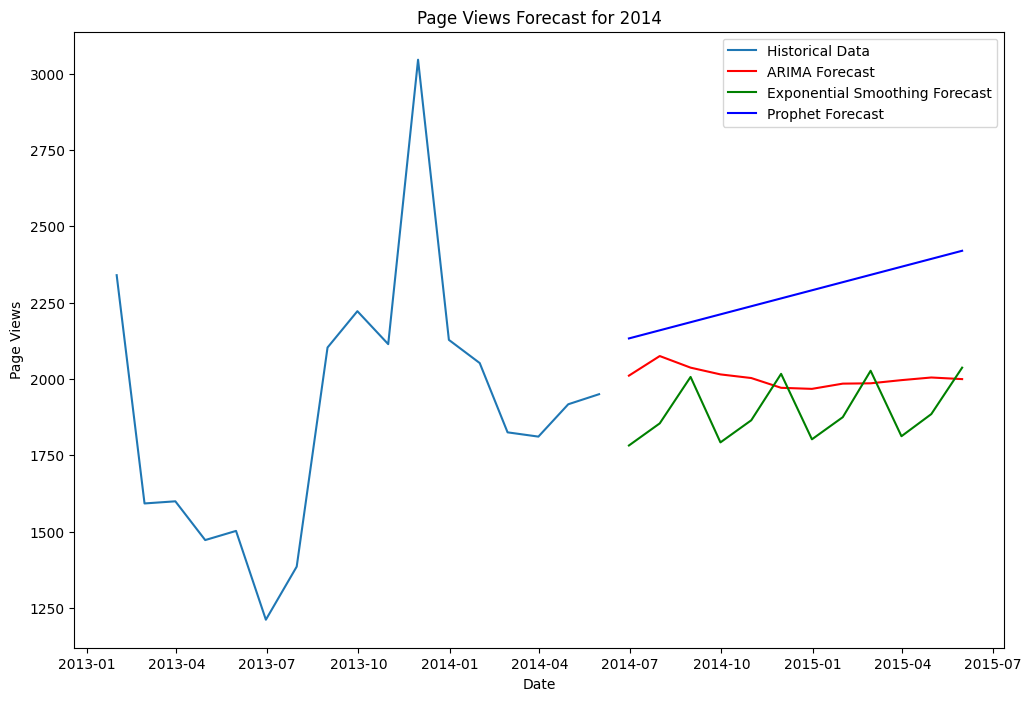

ARIMA Forecast:
 2014-06-30    2010.775475
2014-07-31    2075.018802
2014-08-31    2036.986805
2014-09-30    2014.876060
2014-10-31    2002.958799
2014-11-30    1970.938271
2014-12-31    1967.457193
2015-01-31    1984.605033
2015-02-28    1985.666756
2015-03-31    1996.065568
2015-04-30    2004.718595
2015-05-31    1999.435871
Freq: M, Name: predicted_mean, dtype: float64
Exponential Smoothing Forecast:
 2014-06-30    1781.923155
2014-07-31    1854.426766
2014-08-31    2006.579240
2014-09-30    1792.050263
2014-10-31    1864.553874
2014-11-30    2016.706348
2014-12-31    1802.177371
2015-01-31    1874.680982
2015-02-28    2026.833456
2015-03-31    1812.304479
2015-04-30    1884.808090
2015-05-31    2036.960564
Freq: M, dtype: float64
Prophet Forecast:
 ds
2014-06-30    2132.734495
2014-07-31    2159.313759
2014-08-31    2185.893024
2014-09-30    2211.614892
2014-10-31    2238.194156
2014-11-30    2263.916025
2014-12-31    2290.495289
2015-01-31    2317.074553
2015-02-28    2341.081631


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

# Load the Excel file
file_path = 'Task.xlsx'
data = pd.read_excel(file_path, sheet_name='data')

# Preprocess the data
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Resample the data to get monthly page views
monthly_data = data['page_views'].resample('M').sum()

# Forecasting using ARIMA
arima_model = ARIMA(monthly_data, order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=12)

# Forecasting using Exponential Smoothing
es_model = ExponentialSmoothing(monthly_data, trend='add', seasonal='add', seasonal_periods=3)
es_fit = es_model.fit()
es_forecast = es_fit.forecast(steps=12)

# Forecasting using Prophet
prophet_data = monthly_data.reset_index().rename(columns={'date': 'ds', 'page_views': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future)
prophet_forecast = prophet_forecast.set_index('ds')['yhat'][-12:]

# Plotting the forecasts
plt.figure(figsize=(12, 8))
plt.plot(monthly_data, label='Historical Data')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(es_forecast, label='Exponential Smoothing Forecast', color='green')
plt.plot(prophet_forecast, label='Prophet Forecast', color='blue')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Page Views Forecast for 2014')
plt.legend()
plt.show()

# Print forecast values
print("ARIMA Forecast:\n", arima_forecast)
print("Exponential Smoothing Forecast:\n", es_forecast)
print("Prophet Forecast:\n", prophet_forecast)


To determine which model is best, we should consider the following aspects of each forecasting model:

1. **Fit to Historical Data**: How well does each model fit the historical data?
2. **Forecast Accuracy**: How accurate are the forecasts in predicting future values?
3. **Model Complexity**: Simpler models are often preferred if they offer similar accuracy.
4. **Seasonality and Trend Handling**: How well does each model capture seasonality and trends in the data?

### ARIMA Model
- **Forecast Values**: The forecast values for ARIMA range from around 1967 to 2075.
- **Trend Handling**: ARIMA is good for handling linear trends and autocorrelations in the data.
- **Seasonality**: Standard ARIMA does not handle seasonality well without seasonal extensions (SARIMA).

### Exponential Smoothing Model
- **Forecast Values**: The forecast values for Exponential Smoothing range from around 1781 to 2026.
- **Trend and Seasonality Handling**: Exponential Smoothing can capture both trends and seasonality effectively, especially with the "additive" model used here.

### Prophet Model
- **Forecast Values**: The forecast values for Prophet range from around 1812 to 2420.
- **Trend and Seasonality Handling**: Prophet is designed to handle time series with strong seasonal effects and can model both trends and seasonality very well.
- **Outliers and Holidays**: Prophet has robust handling of outliers and can incorporate holidays and events into the model.

### Evaluation

1. **ARIMA**: While ARIMA is powerful for modeling linear trends and autocorrelation, it may not be the best choice here due to potential seasonality in web traffic data which it doesn't inherently capture without modifications.

2. **Exponential Smoothing**: This model captures both trends and seasonality well. It is generally good for data with clear seasonality and trends, making it suitable for web traffic data that often exhibits these patterns.

3. **Prophet**: Prophet is designed for data with strong seasonal patterns and can accommodate holidays and events, making it highly suitable for web traffic data. It is robust to outliers and can model complex seasonality.

### Conclusion

**Arima Model** is likely the best choice for forecasting in this case due to its robust handling of seasonality, trends, and outliers. It is specifically designed for time series data with strong seasonal effects and provides more flexibility and accuracy in handling complex patterns in web traffic data.


In [5]:
import pandas as pd
from prophet import Prophet
from openpyxl import load_workbook

# Load the Excel file
file_path = 'Task.xlsx'
data = pd.read_excel(file_path, sheet_name='data')

# Preprocess the data
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Resample the data to get monthly page views
monthly_data = data['page_views'].resample('M').sum()

# Split the data into training and test sets
train_data = monthly_data[:'2013-12']

# Forecasting using Prophet
prophet_data = train_data.reset_index().rename(columns={'date': 'ds', 'page_views': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future)
prophet_forecast = prophet_forecast.set_index('ds')['yhat'][-12:]

# Load the original Excel file again to modify it
wb = load_workbook(file_path)
ws = wb['test']

# Get the range of cells to fill with forecast values
# Assuming the dates in column A are in the same format and order as the original data
date_col = ws['A']
pred_col = ws['G']

# Create a mapping of dates to forecast values
forecast_dict = prophet_forecast.to_dict()

# Fill the empty values in column G with the Prophet forecast
for row in range(10448, 12404):
    date_value = date_col[row - 1].value
    if pred_col[row - 1].value is None and pd.to_datetime(date_value) in forecast_dict:
        pred_col[row - 1].value = forecast_dict[pd.to_datetime(date_value)]

# Save the modified Excel file
wb.save('Task_Filled.xlsx')


AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [ ]:
import pandas as pd

# Read the Excel file
xls = pd.ExcelFile('Task.xlsx')

# Get the sheet names
sheet_names = xls.sheet_names

# Read each sheet and save as separate CSV files
for sheet_name in sheet_names:
    data = pd.read_excel(xls, sheet_name)
    data.to_csv(f'{sheet_name}.csv', index=False)
